In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nb_env import data
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from ISLP import *
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [2]:
df = pd.read_csv(data)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Part 1: KNN by hand for k=1

In [3]:
# Get a subset of data i.e. rows 5 to 13
# Use the TV column as the predictor and sales as Response
x_true = df['TV'].iloc[5:13]
y_true = df['sales'].iloc[5:13]

# Sort the data to get indices ordered from lowest to highest df['TV']
idx = np.argsort(x_true).values
x_true = x_true.iloc[idx].values
y_true = y_true.iloc[idx].values

true_values = pd.DataFrame({
    'y': y_true,
    'x': x_true
})
true_values

,y,x
0,4.8,8.6
1,7.2,8.7
2,9.2,23.8
3,11.8,57.5
4,8.6,66.1
5,13.2,120.2
6,10.6,199.8
7,17.4,214.7


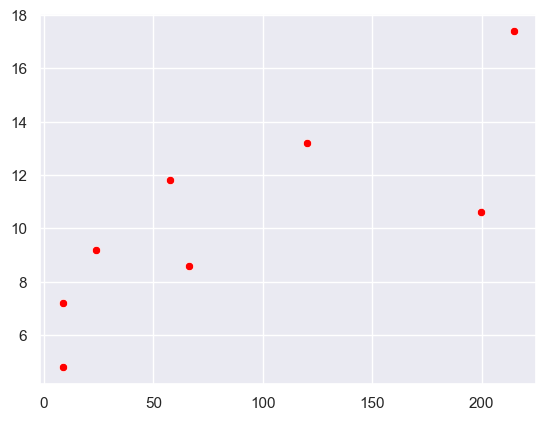

In [4]:
# graphically
sns.set_theme(style='darkgrid')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=x_true, y=y_true, color='red', ax=ax)

# ax.legend()
plt.show()

In [5]:
# Now we need to create our function
# Note that this is just for k = 1 where the distance function is simply the absolute value.
# This def: takes an array and a value (will be used in iteration), the value by each item
# in the array, add the differences to a series, find the first lowest value in the list of 
# differences, and return the index of the first lowest difference

def find_nearest(array,value):
    idx = pd.Series(np.abs(array-value)).idxmin() 
    return idx, array[idx]

In [6]:
# Create some synthetic x-values (might not be in the actual dataset)
x = np.linspace(np.min(x_true), np.max(x_true))

# Initialize the y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))

# Apply the KNN algorithm to predict the y-value for the given x value
for i, xi in enumerate(x):

    # Get the Sales values closest to the given x value
    y[i] = y_true[find_nearest(x_true, xi )[0]]

C:\Users\joao.santos\AppData\Local\Temp\ipykernel_22756\3290902529.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_true, y_true, 'kx', color='red')


Text(0, 0.5, 'Sales')

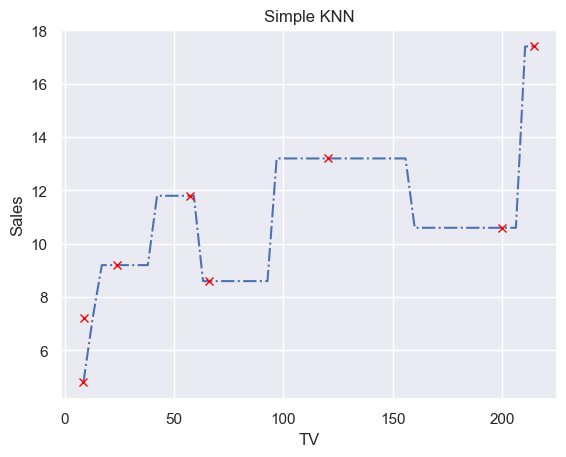

In [7]:
plt.plot(x,y,'-.')
plt.plot(x_true, y_true, 'kx', color='red')
plt.title('Simple KNN')
plt.xlabel('TV')
plt.ylabel('Sales')

## Part 2: KNN for k ≥ 1 using sklearn

In [8]:
# Set predictor and response
x = df[['TV']].values
y = df[['sales']].values

In [9]:
# Split the data into training and test for function (train_test_split())
# We will set 60% training and 40% testing, random state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=42)

In [10]:
k_value_min = 1
k_value_max = 70
k_list = np.linspace(k_value_min, k_value_max, 70)

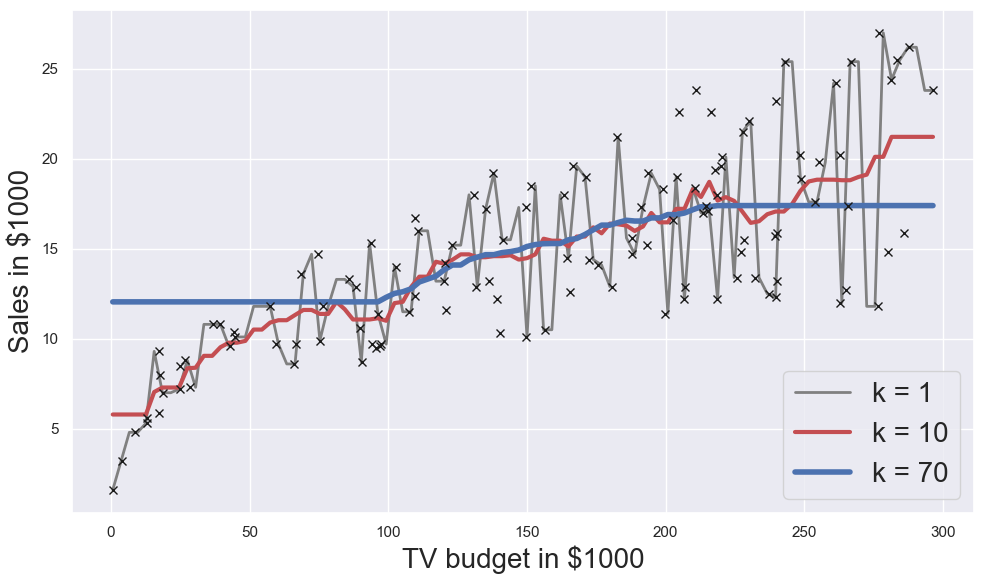

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
j=0     # will be used to alter the width of each plot

for k_value in k_list:
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    colors = ['grey', 'r', 'b']
    if k_value in [1, 10, 70]:
        xvals = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1

ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='train',color='k')
# ax.plot(x_test, y_test,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()